In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\yash-\Downloads\linear_regression_train (2).csv")


In [4]:
d_np=data.to_numpy()
d_np.shape

(48000, 27)

In [5]:
X=d_np[:,1:26]
y=d_np[:,26]
X_mean=np.mean(X)
X_std=np.std(X)
X_normalize=(X-X_mean)/X_std

In [6]:
X_train=X_normalize[0:38400,:]
X_test=X_normalize[38401:,:]
y_train=y[0:38400]
y_test=y[38401:]

Total cost is 58076.05512087727
Mean Squared Error is 116993.32227017466
R2score of model is 0.9748679010860577


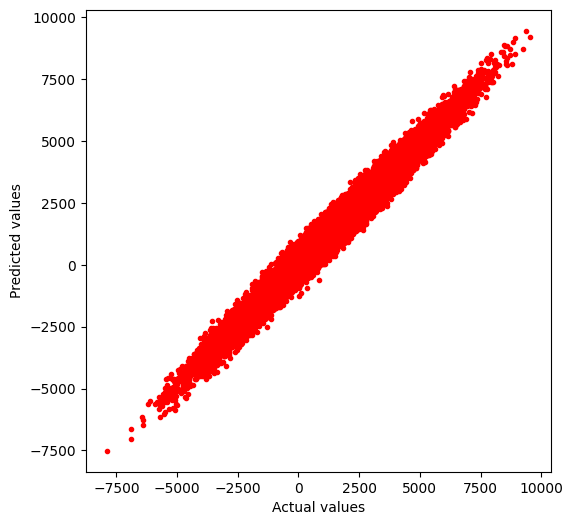

LEARNING CURVE


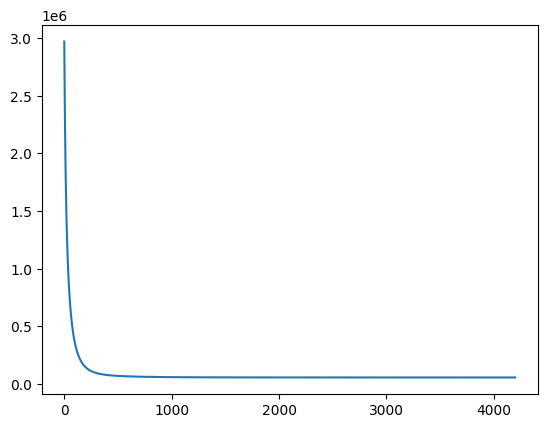

In [ ]:

def loss_function(y,y_pred):
    loss=np.mean((y_pred-y)**2)
    return loss
def cost_function(X,y,w,b):
    m=X.shape[0]
    cost=0.0
    for i in range(m):
     f_wb=np.dot(w,X[i])+b
     cost+=(f_wb-y[i])**2
    total_cost=(1/(2*m))*cost
    return total_cost
def calculate_gradients(X,y,y_pred):
    n_samples,n_features = X.shape
    dw = (1/n_samples)*np.dot(X.T,(y_pred-y))
    db = (1/n_samples)*np.sum(y_pred-y)
    return dw,db
def train(X,y,epochs,lr,lambd):
    m,n=X.shape
    w=np.zeros(n)
    b=0
    cost_list=[]
    for epoch in range(epochs):
            y_hat=np.dot(X,w)+b
            dw,db=calculate_gradients(X,y,y_hat)
            w=w*(1-(lr*lambd)/m)-lr*dw
            b-=lr*db
            cost=cost_function(X,y,w,b)
            cost_list.append(cost)
    return w,b,cost_list
def predict(X,w,b):
    return np.dot(X,w) +b

def r2square(y,y_hat):
    sse=np.sum((np.array(y) - np.array(y_hat))**2)
    tse=np.sum((np.array(y)-np.mean(np.array(y_hat)))**2)
    return 1-sse/tse
 
epochs=4200  
w_trained,b_trained,Cost_list=train(X_train,y_train,epochs=epochs,lr=0.1,lambd=0.01)
y_hat=predict(X_test,w_trained,b_trained)
y_hatt=predict(X_train,w_trained,b_trained)
print('Total cost is',cost_function(X_train,y_train,w_trained,b_trained))
print('Mean Squared Error is',loss_function(y_test,y_hat))
print('R2score of model is',r2square(y_test,y_hat))
fig=plt.figure(figsize=(6,6))
plt.plot(y_train,y_hatt,'r.')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()
print("LEARNING CURVE")
t=np.arange(0,epochs)
plt.plot(t,Cost_list)
plt.show()